<h1>Sentiment Analysis for Roman Urdu Languages using Kaggle Dataset </h1>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#making corpus or words from comments
import re
from nltk.stem.porter import PorterStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<h1> Step1: Read the CSV Which Downloaded From Kaggle</h1>

In [2]:
dataset = pd.read_csv('E:\Self Learning\Raster_Time_Series\Roman Urdu DataSet.csv')


<h1> Step2: Show the Output of the Dataframe</h1>

In [3]:
dataset

,Comment,sentiment,nan
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN
2,"Kya bt hai,",Positive,NaN
3,Wah je wah,Positive,NaN
4,Are wha kaya bat hai,Positive,NaN
...,...,...,...
14641,Han mene abhi dekhna start kia last 3 episodes se,Neutral,NaN
14642,Kitna acha bhai hai kehta me daant kha lun ga ...,Positive,NaN
14643,DJ ko aik pappi idrrr aikk pappii udrr,Positive,NaN
14644,Dj ki wja se drama dykna ka dil krta h,Positive,NaN


<h1> Step3: Select First few Records</h1>

In [5]:
dataset.head(15)


,Comment,sentiment,nan
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN
2,"Kya bt hai,",Positive,NaN
3,Wah je wah,Positive,NaN
4,Are wha kaya bat hai,Positive,NaN
5,Wah kya baat likhi,Positive,NaN
6,Wha Itni sari khubiya,Positive,NaN
7,Itni khubiya,Positive,NaN
8,Ya allah rehm farma hm sab pe or zalimo ko hid...,Positive,NaN
9,Please Everyone AllAh S.w.T ka naam hAmesha Ba...,Positive,NaN


<h1> Step4: Check whether you have equal number of Training Samples for Each Class</h1>

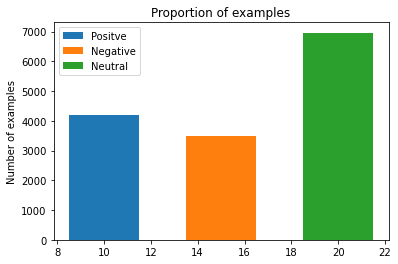

In [6]:
Pos = dataset[dataset['sentiment'] == 'Positive'].shape[0]
Neg = dataset[dataset['sentiment'] == 'Negative'].shape[0]
Neu = dataset[dataset['sentiment'] == 'Neutral'].shape[0]
# bar plot of the 3 classes
plt.bar(10,Pos,3, label="Positve")
plt.bar(15,Neg,3, label="Negative")
plt.bar(20,Neu,3, label="Neutral")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

<h1> Step 5: Do Some Data Cleaning like Remove Stop Words and Transformation</h1>

In [7]:
y=dataset.iloc[:,1].values
labelEnocder_y=LabelEncoder()
y=labelEnocder_y.fit_transform(y)
# 2 postive 0 negative 1 nuetral

In [8]:
corpus=[]
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']
for i in range(0,14646):
    review = re.sub('[^a-zA-Z]',' ',dataset.iloc[:,0].values[i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stopwords]
    review=' '.join(review)
    corpus.append(review)

<h1> Step 6: Vectorize Data for Passing it into Machine Learning Models</h1>

In [9]:
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(corpus).toarray()

<h1> Step 7: Split Data Into Traing and Testing</h1>

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


<h1> Step 8: Apply Regression Model and Start Training</h1>

In [11]:
classifier=LogisticRegression(random_state=0,solver='liblinear',multi_class='auto')
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

<h1> Step 9: Apply Classifier and Perform Prediction on Test Data</h1>

In [12]:
y_pred=classifier.predict(x_test)


<h1> Step 10: Plot Confusion Matrix for Evaluation and Performance</h1>

In [13]:
cm=confusion_matrix(y_test,y_pred)


In [14]:
cm

array([[ 284,  280,  103],
       [ 105, 1152,  170],
       [  99,  328,  409]], dtype=int64)

In [15]:
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))


Accuracy is 0.6296928327645052 


<ipython-input-16-a4c09c4060a8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-a4c09c4060a8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


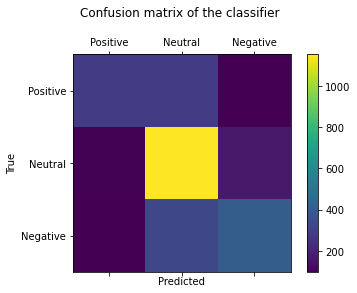

In [16]:
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()